In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "./data/"
df_train = pd.read_csv(data_path + "train.csv")
df_test = pd.read_csv(data_path + "test.csv")

# drop id
df_train.drop('id', axis=1, inplace=True)

df_train['date'] = pd.to_datetime(df_train['date'])

df_train.head(10)

,date,country,store,product,num_sold
0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
5,2017-01-01,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88
6,2017-01-01,Argentina,Kaggle Store,Using LLMs to Train More LLMs,98
7,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win Friends and Influence People,14
8,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win More Kaggle Competitions,83
9,2017-01-01,Argentina,Kaggle Store,Using LLMs to Write Better,69


In [21]:
# split into train and validation
from sklearn.model_selection import train_test_split

X = df_train[['year', 'month', 'day', 'country', 'store', 'product']]
y = df_train['num_sold']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['year', 'month', 'day'] not in index"

c:\Users\Wiktor\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


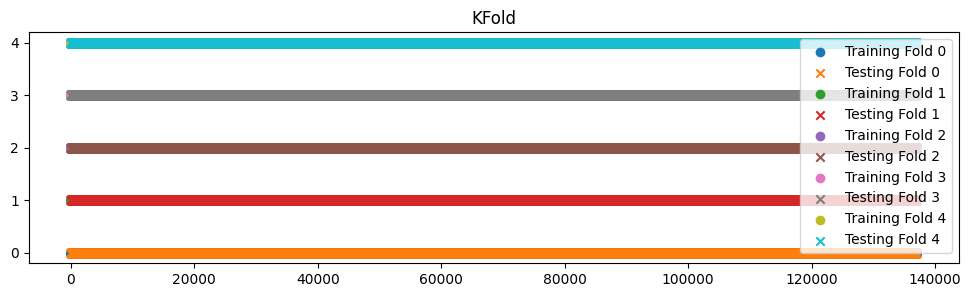

In [22]:
import pandas as pd
from sklearn.model_selection import KFold

def plot_kfold_split(df, kfold_function):
    # create a visualisation of the kfold_function split between train and test
    fig, ax = plt.subplots(figsize=(12, 3))
    for i, (train_index, test_index) in enumerate(kfold_function.split(df)):
        # Visualize the training test indices
        ax.scatter(train_index, [i] * len(train_index), label="Training Fold {}".format(i))
        # Visualize the testing test indices
        ax.scatter(test_index, [i] * len(test_index), marker='x', label="Testing Fold {}".format(i))
    ax.legend()
    plt.title("{}".format(kfold_function.__class__.__name__))
    plt.show()
  
plot_kfold_split(df_train, KFold(n_splits=5, shuffle=True, random_state=42))

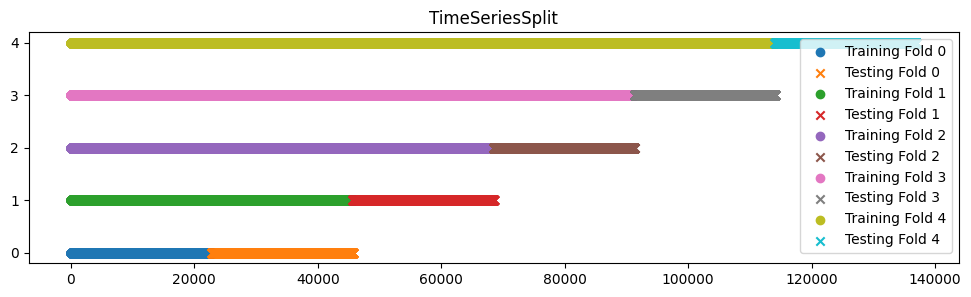

In [23]:
from sklearn.model_selection import TimeSeriesSplit

plot_kfold_split(df_train, TimeSeriesSplit(n_splits=5))